Text(0.5, 1.0, 'Updated node features')

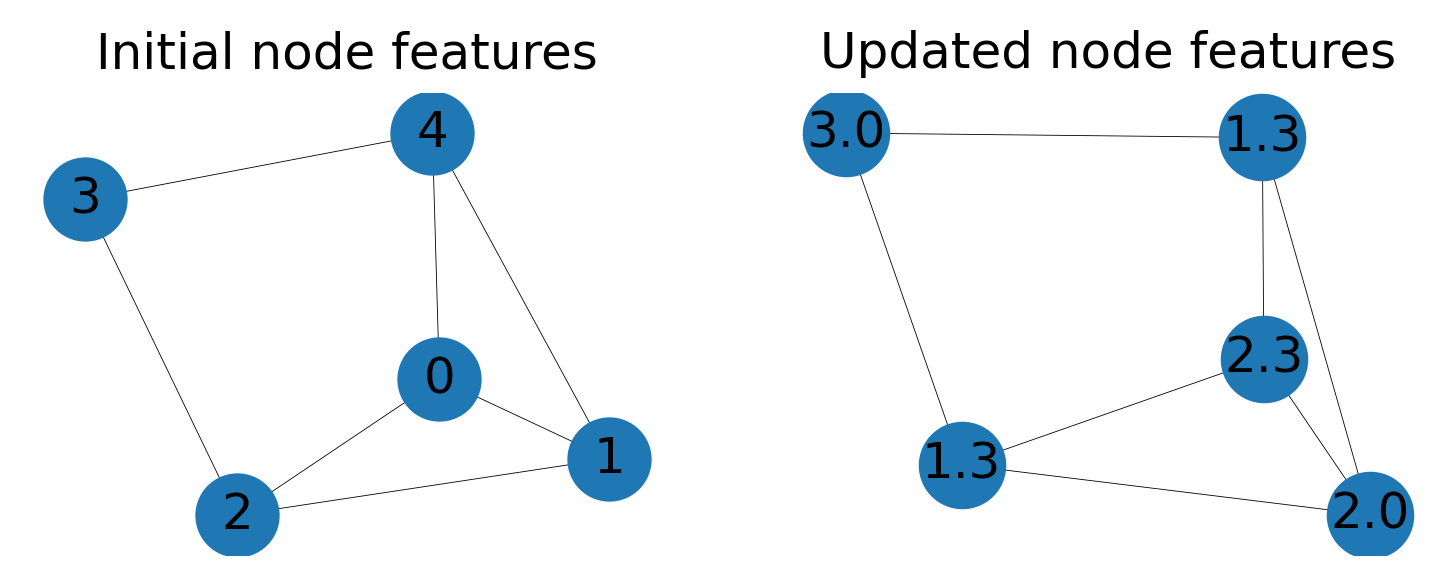

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# create a graph with 5 nodes
np.random.seed(42)
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])

# add edges to the graph
G.add_edges_from([(0, 1), (0, 2), (0, 4), (1, 2), (1, 4), (2, 3), (3, 4)])

# initialize the node features
node_features_list = [0,1,2,3,4]
node_features = {node: node_features_list[node] for node in G.nodes}

# message passing for 3 iterations
updated_node_features = {}
for i in range(3):
  for node in G.nodes:
    # update the node features by averaging the values of all its neighbors
    updated_node_features[node] = np.round(np.mean([node_features[neighbor] for neighbor in G[node]]),1)

# visualize the graph with initial and updated node features
fig, ax = plt.subplots(1, 2, figsize=(6, 2),dpi=300)
nx.draw(G, with_labels=True, node_size=370,width=0.2, font_size=12, labels=node_features, ax=ax[0],pos=nx.spring_layout(G))
nx.draw(G, with_labels=True, node_size=400,width=0.2, font_size=12, labels=updated_node_features, ax=ax[1],pos=nx.spring_layout(G))
# title
ax[0].set_title('Initial node features')
ax[1].set_title('Updated node features')

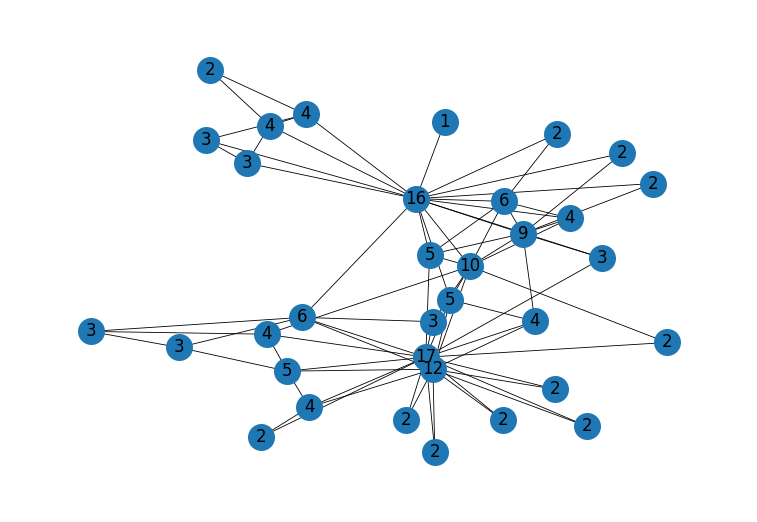

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# read graph
G = nx.karate_club_graph()
# compute node degrees
degree = dict(G.degree())

# plot
fig, ax = plt.subplots(figsize=(3, 2),dpi=300)
# set node label as degree
nx.draw(G, with_labels=True, node_size=30,width=0.2, font_size=4, labels=degree)

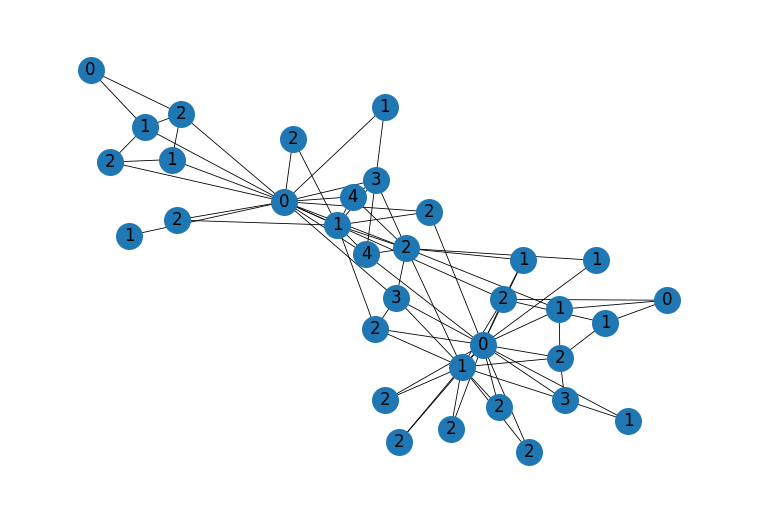

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# read graph
G = nx.karate_club_graph()
# compute node coloring number
coloring_number = nx.coloring.greedy_color(G, strategy="largest_first")

# plot
fig, ax = plt.subplots(figsize=(3, 2),dpi=300)
# set node label as coloring_number
nx.draw(G, with_labels=True, node_size=30,width=0.2, font_size=4, labels=coloring_number)

ypes of Graph Neural Networks
Learn more about different types of graph neural networks.

We'll cover the following

Graph convolutional neural networks
Spectral-based networks
Spatial-based networks
Graph attention networks
Recurrent graph neural networks
Workings of a graph neural network
We have different types of graph neural network architectures. Some of the popular ones include the following:

Graph convolutional neural networks

Graph attention networks

Recurrent graph neural networks

Let's go through them one by one.

Graph convolutional neural networks
Graph convolutional neural networks (GCNs) are a variety of convolutional neural networks that work on graphs. We can broadly divide GCN models into spectral-based and spatial-based graph convolutional networks.

Spectral-based networks
The foundation of spectral-based methods comes from graph signal processing. The core idea behind the spectral networks is to use the spectrum of the graph, i.e., the eigenvalues and eigenvectors, to perform convolution operations on the graph.

We define a set of basis functions that captures the graph structure well. These basis functions are used as filters (similar to what we see in a traditional convolutional network).

The neural network model has multiple layers which perform the graph convolution operations. The convolution operation is as follows:

�
=
�
(
�
∗
�
+
�
)
Y=f(X∗F+b)

where, 
�
f
 is the activation function, 
�
X
 is the input matrix of the graph, 
�
F
 is the filter, and 
�
b
 is the bias term. 
�
Y
 is the output matrix that’s transformed into a graph and then passed on to the next layer as input.

Graph convolutional networks, a variant of spectral-based graph neural networks, use the basis functions derived from eigenvectors of the graph's Laplacian matrix.

ChebNet, another variant of the spectral-based GNN, uses Chebyshev polynomials as the basis functions for the graph convolution operation. Chebyshev polynomials are a type of mathematical function defined by recursive formulas and widely used in signal processing. This method captures the local graph structure with small parameters and is more efficient to train than other GNN models.

GCNs are more flexible and can be applied to a wide variety of graph structures, while ChebNet is mostly used for graphs with a small number of eigenvalues.

Spatial-based networks
These are another type of convolutional networks that are applied to graphs and differ from spectral-based networks. Spatial-based GNNs don't use basis functions or eigenvectors like spectral methods but use a fixed set of filters that can be directly applied to the graph. This method makes it easier to train using a small number of parameters.

GraphSAGE is a popular example of a spatial-based model. It uses a fixed set of filters and aggregates the neighborhood information to update the node features.

Graph attention networks
Graph attention networks (GAT) use attention weights to indicate the connection strength between a node and its neighbor. This is done by using an attention mechanism.

Let's understand a few things about the attention mechanism. It's a mechanism to assign weight or importance to different parts of an input. In natural language processing, the attention mechanism assigns more weight to certain words considered important and less weight to others.

Similarly, GATs assign attention weights to the important edges in the graph, which are used to update the node features. This attention mechanism allows the model to focus on the most important links when making predictions.

Recurrent graph neural networks
Recurrent graph neural networks (RGNN) build their architecture with recurrent neural network (RNN) layers. RNNs are widely used for natural language processing or time series analysis, in which information is processed in a recursive manner from one timestep to another.

Similarly, RGNN's RNN layers process the graph's nodes and edges in a recursive manner. At each timestep, we aggregate and update the node features of the graph recursively until the algorithm reaches a stopping condition or exhausts the fixed number of timesteps.

Workings of a graph neural network
Let's see how a graph neural network looks when coded.

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(42)

num_nodes = 5 # number of nodes

# number of classes in the classification task
num_classes = 3

# adjacency matrix
A = torch.tensor([[0, 1, 1, 0, 0],
                  [1, 0, 1, 1, 0],
                  [1, 1, 0, 1, 1],
                  [0, 1, 1, 0, 1],
                  [0, 0, 1, 1, 0]], dtype=torch.float)

# feature matrix for the nodes
X = torch.tensor([[0.5, 0.2],
                  [0.1, 0.7],
                  [0.9, 0.3],
                  [0.2, 0.1],
                  [0.8, 0.5]], dtype=torch.float)

# labels for the nodes
y = torch.tensor([0, 1, 2, 2, 1], dtype=torch.long)

# GCN model
class GCN(nn.Module):
  def __init__(self, num_nodes, num_classes):
    super(GCN, self).__init__()
    self.l1 = nn.Linear(2, 3)
    self.l2 = nn.Linear(3, num_classes)

  def forward(self, A, X):
    H = self.l1(X)
    H = A @ H
    H = self.l2(H)
    return H

# Initialize the GCN model
model = GCN(num_nodes, num_classes)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the GCN model
for epoch in range(100):
  # Forward pass
  output = model(A, X)
  loss = criterion(output, y)
  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Test the GCN model
with torch.no_grad():
  output = model(A, X)
  _, predicted = torch.max(output, dim=1)
  correct = (predicted == y).sum().item()
  print(f'Accuracy score: {correct / len(y)}')

{('Adam', 'Book'): Text(0.0007998052411876261, 0.5195366676048903, 'reads'),
 ('Book',
  'Library'): Text(0.45464977585531846, -0.36936990663730573, 'stored'),
 ('Kate', 'Book'): Text(-0.48959171433019505, -0.11109342575780415, 'writes')}

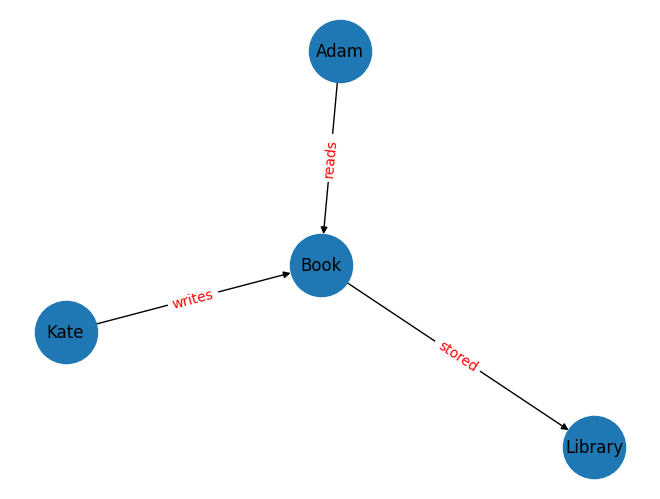

In [4]:
#knowledge Graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# create a knowledge graph
knowledge_graph = nx.DiGraph()

# add triples
knowledge_graph.add_edge('Adam', 'Book', relation='reads')
knowledge_graph.add_edge('Kate', 'Book', relation='writes')
knowledge_graph.add_edge('Book', 'Library', relation='stored')

# graph layout
pos = nx.spring_layout(knowledge_graph)

# plot graph
nx.draw(knowledge_graph, pos, edge_color='black', 
        width=1, linewidths=1, node_size=2000, 
        labels={node: node for node in knowledge_graph.nodes()})
# plot edge labels
nx.draw_networkx_edge_labels(knowledge_graph, pos,
    edge_labels=nx.get_edge_attributes(knowledge_graph, 'relation'),
    font_color='red')


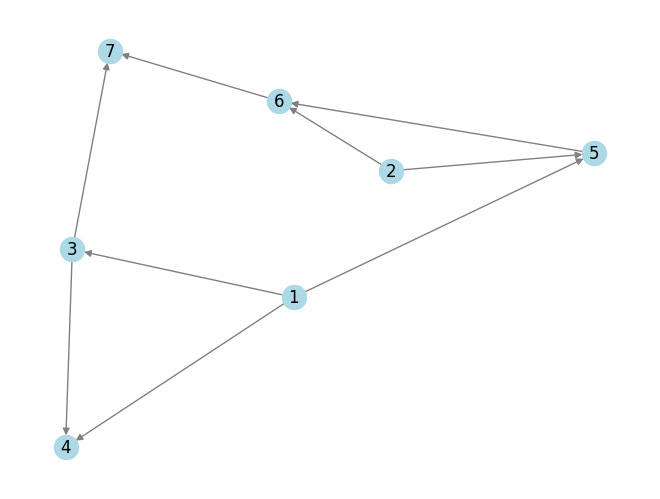

In [5]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

# Connect to the database and create a cursor
conn = sqlite3.connect('sports_club.db')
c = conn.cursor()

# Create the nodes table
c.execute('''CREATE TABLE nodes (id INTEGER PRIMARY KEY, name TEXT)''')

# Insert 7 nodes into the table
c.execute("INSERT INTO nodes VALUES (1, 'Player 1')")
c.execute("INSERT INTO nodes VALUES (2, 'Player 2')")
c.execute("INSERT INTO nodes VALUES (3, 'Player 3')")
c.execute("INSERT INTO nodes VALUES (4, 'Player 4')")
c.execute("INSERT INTO nodes VALUES (5, 'Player 5')")
c.execute("INSERT INTO nodes VALUES (6, 'Player 6')")
c.execute("INSERT INTO nodes VALUES (7, 'Player 7')")

# Create the edges table
c.execute('''CREATE TABLE edges (id INTEGER PRIMARY KEY, node1 INTEGER, node2 INTEGER)''')

# Insert edges between the nodes
c.execute("INSERT INTO edges VALUES (1, 1, 4)")
c.execute("INSERT INTO edges VALUES (2, 1, 3)")
c.execute("INSERT INTO edges VALUES (3, 3, 4)")
c.execute("INSERT INTO edges VALUES (4, 2, 5)")
c.execute("INSERT INTO edges VALUES (5, 5, 6)")
c.execute("INSERT INTO edges VALUES (6, 6, 7)")
c.execute("INSERT INTO edges VALUES (7, 1, 5)")
c.execute("INSERT INTO edges VALUES (8, 2, 6)")
c.execute("INSERT INTO edges VALUES (9, 3, 7)")

# Commit the changes to the database
conn.commit()

# Create a directed graph using networkx
G = nx.DiGraph()

# Retrieve the nodes from the database and add them to the graph
c.execute("SELECT * FROM nodes")
for row in c:
    G.add_node(row[0], label=row[1])

# Retrieve the edges from the database and add them to the graph
c.execute("SELECT * FROM edges")
for row in c:
    G.add_edge(row[1], row[2])

# Close the connection to the database
conn.close()

# Draw the graph using matplotlib
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

In [6]:
import networkx as nx

# Create a knowledge graph
G = nx.Graph()

# Add nodes representing different products
G.add_nodes_from(["Product A", "Product B", "Product C",
                  "Product D", "Product E", "Product F", 
                  "Product G", "Product H", "Product I", 
                  "Product J"])

# edges are products that are often purchased together
G.add_edge("Product A", "Product B")
G.add_edge("Product A", "Product C")
G.add_edge("Product B", "Product D")
G.add_edge("Product C", "Product E")
G.add_edge("Product D", "Product F")
G.add_edge("Product E", "Product G")
G.add_edge("Product F", "Product H")
G.add_edge("Product G", "Product I")
G.add_edge("Product H", "Product J")

# Function to recommend products
def recommend_products(product):
    # Find the neighbors of the input product
    neighbors = list(nx.neighbors(G, product))
    # Return the list of recommended products
    return neighbors

# Example usage
print(recommend_products("Product A")) 
# Returns: ['Product B', 'Product C']

['Product B', 'Product C']


In [7]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Add nodes representing products
products = ["Product A", "Product B", "Product C", 
            "Product D", "Product E", "Product F", 
            "Product G", "Product H", "Product I", 
            "Product J"]
G.add_nodes_from(products)

# Add edges and weights between products that are often purchased together
G.add_edge("Product A", "Product B", weight=0.8)
G.add_edge("Product A", "Product C", weight=0.7)
G.add_edge("Product B", "Product D", weight=0.9)
G.add_edge("Product C", "Product E", weight=0.6)
G.add_edge("Product D", "Product F", weight=0.8)
G.add_edge("Product E", "Product G", weight=0.7)
G.add_edge("Product F", "Product H", weight=0.9)
G.add_edge("Product G", "Product I", weight=0.6)
G.add_edge("Product H", "Product J", weight=0.8)

# Define a dictionary to store the popularity of each product
popularity = {"Product A": 100, "Product B": 90, "Product C": 80, 
              "Product D": 70, "Product E": 60, "Product F": 50, 
              "Product G": 40, "Product H": 30, "Product I": 20, 
              "Product J": 10}

# Function to recommend products
def recommend_products(product, n=2):
    # Find the neighbors 
    neighbors = nx.neighbors(G, product)
    # Create a list to store the recommendations
    recommendations = []
    # Iterate through the neighbors
    for neighbor in neighbors:
        # Get the weight of the edge between the input product and the neighbor
        weight = G[product][neighbor]['weight']
        # Get the popularity of the neighbor
        pop = popularity[neighbor]
        # Compute a score based on the weight and popularity
        score = weight * pop
        # Add the neighbor and its score to the list of recommendations
        recommendations.append((neighbor, score))
    # Sort the recommendations by score
    recommendations.sort(key=lambda x: x[1], reverse=True)
    # Return the top n recommendations
    return [x[0] for x in recommendations[:n]]

# Example for product A
print(recommend_products("Product B")) 

['Product A', 'Product D']


In [8]:
import networkx as nx
import numpy as np
from random import shuffle
from sklearn.linear_model import SGDRegressor

# scoring function
def scoring_function(embeddings, edges):
    return np.sum(embeddings[edges[:, 0]] * embeddings[edges[:, 1]], axis=1)

# loss function
def loss_function(scores, labels):
    return ((scores - labels) ** 2).mean()

# optimizer
def optimizer(embeddings, edges, labels, learning_rate):
    scores = scoring_function(embeddings, edges)
    loss = loss_function(scores, labels)
    sgd = SGDRegressor(learning_rate='constant', eta0=learning_rate)
    sgd.partial_fit(embeddings[edges[:, 0]], scores - labels)
    embeddings -= sgd.coef_
    return loss, embeddings

# negative generation function
def negative_generation(edges, num_negatives):
    all_negatives = np.random.randint(0, embeddings.shape[0], size=(num_negatives, 2))
    return np.concatenate([edges, all_negatives], axis=0)

# Create a graph with 5 nodes
graph = nx.Graph()
graph.add_nodes_from(range(5))

# Add some edges to the graph
graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# number of dimensions for the embeddings
embedding_dim = 128

# Initialize the embeddings randomly
embeddings = np.random.rand(graph.number_of_nodes(), embedding_dim)

# number of negative samples
num_negatives = 10

# learning rate
learning_rate = 0.01

# number of iterations
num_iterations = 100

# Get the edges of the graph
edges = np.array(graph.edges())

# Create the labels for the positive edges
labels = np.ones(edges.shape[0])

# Generate the negative edges
negative_edges = negative_generation(edges, num_negatives)

# Concatenate the positive and negative edges
all_edges = np.concatenate([edges, negative_edges], axis=0)

# Concatenate the labels for the positive and negative edges
all_labels = np.concatenate([labels, np.zeros(num_negatives)], axis=0)

# Shuffle the edges and labels
shuffle_indices = np.random.permutation(np.arange(edges.shape[0]))
all_edges = all_edges[shuffle_indices]
all_labels = all_labels[shuffle_indices]

for i in range(num_iterations):
    loss, embeddings = optimizer(embeddings, all_edges, all_labels, learning_rate)
    # Print the loss every 10 iterations
    if i % 10 == 0:
        print("Iteration: {} Loss: {}".format(i, loss.round(5)))
print("*"*10)
print("Shape of emebddings: ",embeddings.shape)

ModuleNotFoundError: No module named 'sklearn'

In [9]:
from pykeen.models import TransE
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# create graph
G = nx.from_pandas_edgelist(df, source='h', target='t', edge_attr='r')

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "TransE",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

In [10]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "TransR",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

In [11]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "RESCAL",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

In [12]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "HolE",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

In [13]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "NTN",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

In [14]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(Nations().training.triples)
df.columns = ['h', 'r', 't']

# Generate triples from the graph
tf = TriplesFactory.from_labeled_triples(df.values)

training, testing = tf.split([0.8, 0.2], random_state=42)
result = pipeline(
        training=training,
        testing=testing,
        model = "ConvE",
        model_kwargs=dict(embedding_dim=16),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=10, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

losses = result.losses
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

ModuleNotFoundError: No module named 'pykeen'

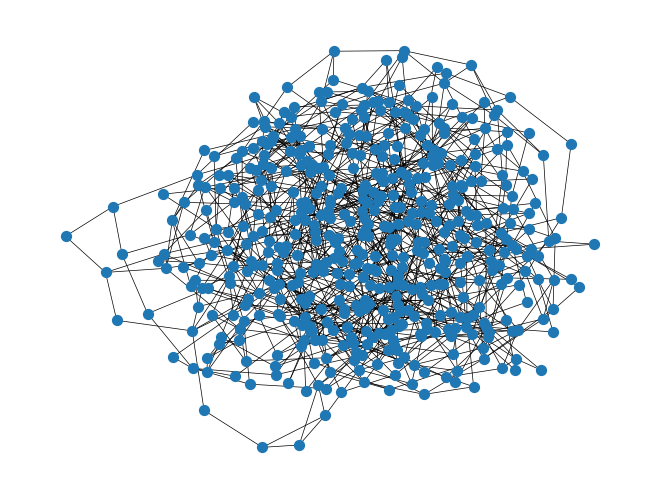

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a synthetic graph with 500 nodes, 4 average degree, and 0.5 rewiring probability
G = nx.watts_strogatz_graph(n=500, k=4, p=0.5, seed=42)

# visualize the graph using matplotlib
nx.draw(G, with_labels=False, node_size=50, width=0.5)

In [16]:
from faker import Faker

faker = Faker()
Faker.seed(0)
# Empty list to store the names
node_names = []

# for loop to generate 500 unique names
for i in range(501):
    # Generate a random name
    name = faker.name()
    # Check if the name is already in the list
    if name not in node_names:
        # If it's not, add it to the list
        node_names.append(name)

# Print 10 names in the list
print(node_names[0:10])

ModuleNotFoundError: No module named 'faker'

In [17]:
import networkx as nx
from faker import Faker
import random
import pandas as pd
random.seed(2023)

# Create a synthetic graph with 500 nodes, 4 average degree, and 0.5 rewiring probability
G = nx.watts_strogatz_graph(n=500, k=4, p=0.5, seed=42)

# node names
faker = Faker()
Faker.seed(0)
node_names = []
# for loop to generate 500 unique names
for i in range(501):
    name = faker.name()
    if name not in node_names:
        node_names.append(name)

# relabel node names of the graph G 
mapping = {i: node_names[i] for i in range(len(node_names))}
G = nx.relabel_nodes(G, mapping)

# remove any possible selfloops
G.remove_edges_from(nx.selfloop_edges(G))

#edge attribute names
attributes = ['friend', 'family', 'acquaintance', 
              'colleague', 'classmate', 'neighbor', 
              'schoolmate']

# probability distribution for each attribute
prob_dist = {'friend': 0.3, 'family': 0.1, 'acquaintance': 0.2, 
             'colleague': 0.1, 'classmate': 0.1, 'neighbor': 0.1, 
             'schoolmate': 0.1}

# assign edge attributes
for edge in G.edges:
    G[edge[0]][edge[1]]['relation'] = random.choices(attributes,weights = list(prob_dist.values()),k=1)[0]

# graph to triple dataframe
triples = []
for edge in G.edges:
    triples.append([edge[0], G[edge[0]][edge[1]]['relation'], edge[1]])

# create dataframe
df = pd.DataFrame(triples)
df.columns = ['h', 'r', 't']

print(df.sample(10))

ModuleNotFoundError: No module named 'faker'

In [18]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline

# create triples factory from the dataset
tf = TriplesFactory.from_labeled_triples(df.values)
# split into training and testing
training, testing = tf.split([0.8, 0.2], random_state=42)

# train using pipeline method
result = pipeline(
        training=training,
        testing=testing,
        model = "TransR",
        model_kwargs=dict(embedding_dim=128),
        optimizer = "adam",
        training_kwargs=dict(num_epochs=20, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 3))

# retrieve results
result_df = result.metric_results.to_df()

print(result_df)

ModuleNotFoundError: No module named 'pykeen'

In [19]:
import networkx as nx
from faker import Faker
import random
import pandas as pd
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
random.seed(2023)

# Create a synthetic graph with 500 nodes, 4 average degree, and 0.5 rewiring probability
G = nx.watts_strogatz_graph(n=500, k=4, p=0.5, seed=42)

# node names
faker = Faker()
Faker.seed(0)
node_names = []
# for loop to generate 500 unique names
for i in range(501):
    name = faker.name()
    if name not in node_names:
        node_names.append(name)

# relabel node names of the graph G 
mapping = {i: node_names[i] for i in range(len(node_names))}
G = nx.relabel_nodes(G, mapping)

# remove any possible selfloops
G.remove_edges_from(nx.selfloop_edges(G))

#edge attribute names
attributes = ['friend', 'family', 'acquaintance', 
              'colleague', 'classmate', 'neighbor', 
              'schoolmate']

# probability distribution for each attribute
prob_dist = {'friend': 0.3, 'family': 0.05, 'acquaintance': 0.2, 
             'colleague': 0.05, 'university': 0.15, 'neighbor': 0.15, 
             'school': 0.1}

# assign edge attributes
for edge in G.edges:
    G[edge[0]][edge[1]]['relation'] = random.choices(attributes,weights = list(prob_dist.values()),k=1)[0]

# graph to triple dataframe
triples = []
for edge in G.edges:
    triples.append([edge[0], G[edge[0]][edge[1]]['relation'], edge[1]])

# create dataframe
df = pd.DataFrame(triples)
df.columns = ['h', 'r', 't']

# create triples using pykeen
tf = TriplesFactory.from_labeled_triples(df.values)
training,testing = tf.split([0.8,0.2], random_state=42)

# train the TransR model using PyKEEN 
result = pipeline(
        training=training,
        testing=testing,
        model = "TransR",
        model_kwargs=dict(embedding_dim=128),
        optimizer = "adamw",
        training_kwargs=dict(num_epochs=50, use_tqdm_batch=False),
        random_seed=42,
        device='cpu',
        negative_sampler = 'bernoulli',
        negative_sampler_kwargs = dict(num_negs_per_pos = 5))

# store rank based metrics in data frame
df_metrics = result.metric_results.to_df()

df_metrics.to_csv('output/df_metrics.csv')

ModuleNotFoundError: No module named 'faker'

In [ ]:
from pykeen.models.predict import get_prediction_df

# get head predictions
df_result = get_prediction_df(
            model=result.model,
            head_label='Tina Spears',
            tail_label="Jenny Stafford",
            triples_factory=result.training,
            add_novelties=False)

# print predictions
print(df_result.head(11))